# Introduction to NMR processing

## Library Imports

In [1]:
from spectrochempy import *
import os

SpectroChemPy's API - v.0.1a2.dev37+g946d8561.d20180122
© Copyright 2014-2018 - A.Travert & C.Fernandez @ LCS


## Import data

Here we import two dataset, one is 1D and the other is 2D

Because , we will sometimes need to recall the original dataset, we create to getting functions

In [2]:
# 1D dataset getting function 
def get_dataset1D():
    dataset1D = NDDataset()
    path = os.path.join(datadir.path, 'nmrdata','bruker', 'tests', 'nmr','bruker_1d')
    dataset1D.read_bruker_nmr(path, expno=1, remove_digital_filter=True)
    return dataset1D

# 2D dataset getting function
def get_dataset2D():
    dataset2D = NDDataset()
    path = os.path.join(datadir.path, 'nmrdata','bruker', 'tests', 'nmr','bruker_2d')
    dataset2D.read_bruker_nmr(path, expno=1, remove_digital_filter=True)
    return dataset2D

In [3]:
dataset1D = get_dataset1D()
dataset1D # display info

NDDataset: [-1037.267, -1077.841, ...,   -0.053,    0.101] unitless

In [4]:
dataset2D = get_dataset2D()
dataset2D

NDDataset: [[   0.062,    0.224, ...,    0.031,   -0.033],
            [  -0.003,    0.162, ...,   -0.081,    0.011],
            ..., 
            [   0.000,   -0.000, ...,    0.000,   -0.000],
            [   0.000,   -0.000, ...,    0.000,   -0.000]] unitless

## Plot the 1D dataset raw data

<IPython.core.display.Javascript object>


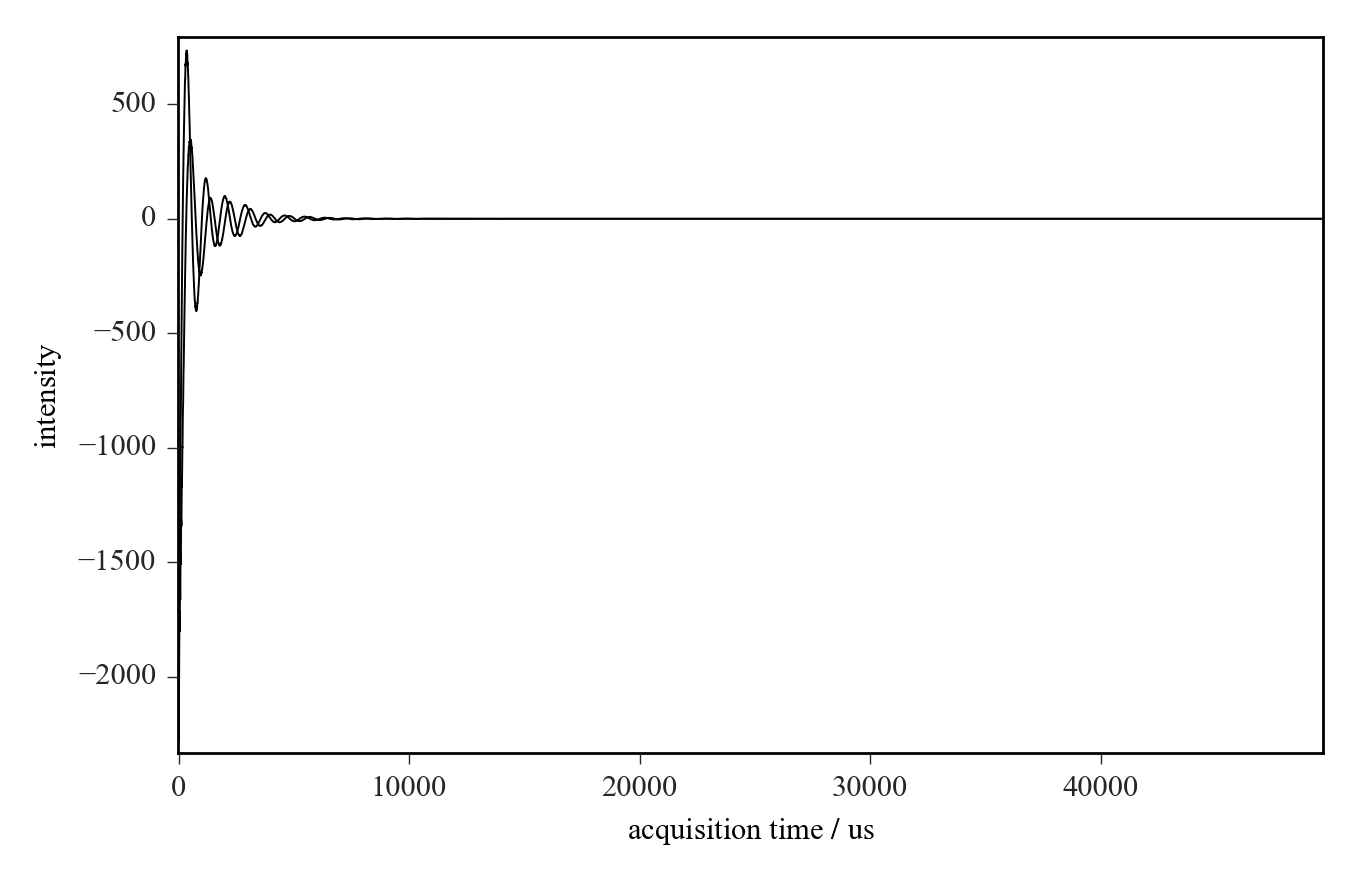

True

In [17]:
# plot the real data
dataset1D.plot(xlim=(0,25000)) 
    # `hold=True` to make that the following plot commands will be on the same graph

# plot the imaginary data on the same plot
dataset1D.plot(imag=True, data_only=True, clear=False)
    # `data_only=True` to plot only the additional data, without updating the figure setting 
    # such as xlim and so on.

To display the imaginary part, one can also simply use the show_complex commands.

<IPython.core.display.Javascript object>


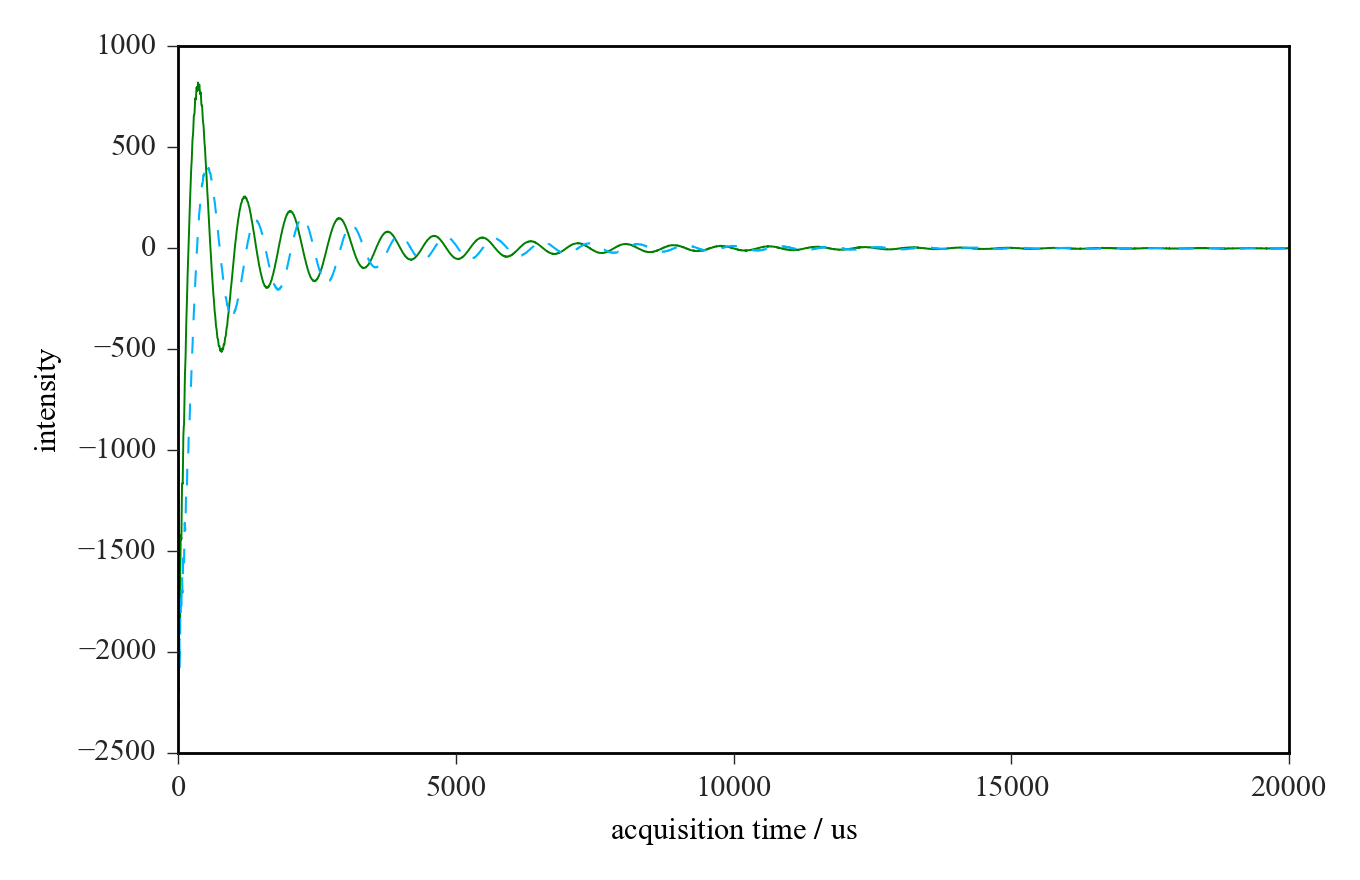

In [6]:
dataset1D.plot(show_complex=True, color='green',
                xlim=(0.,20000.))

## Plot the 2D dataset raw data

<IPython.core.display.Javascript object>


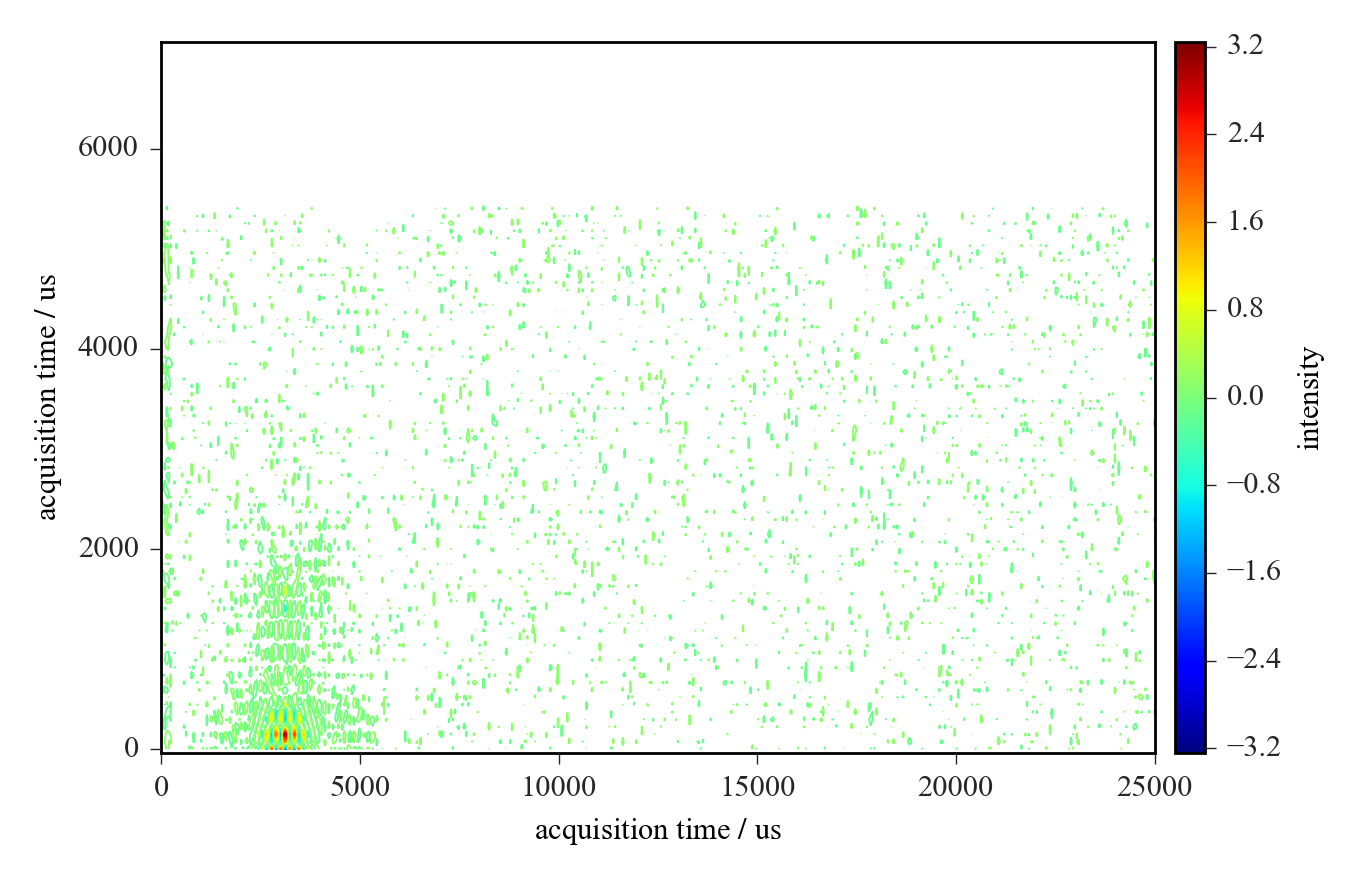

In [8]:
dataset2D = get_dataset2D()
dataset2D.plot_map(xlim=(0.,25000.))

probably less util, but multiple display is also possible

<IPython.core.display.Javascript object>


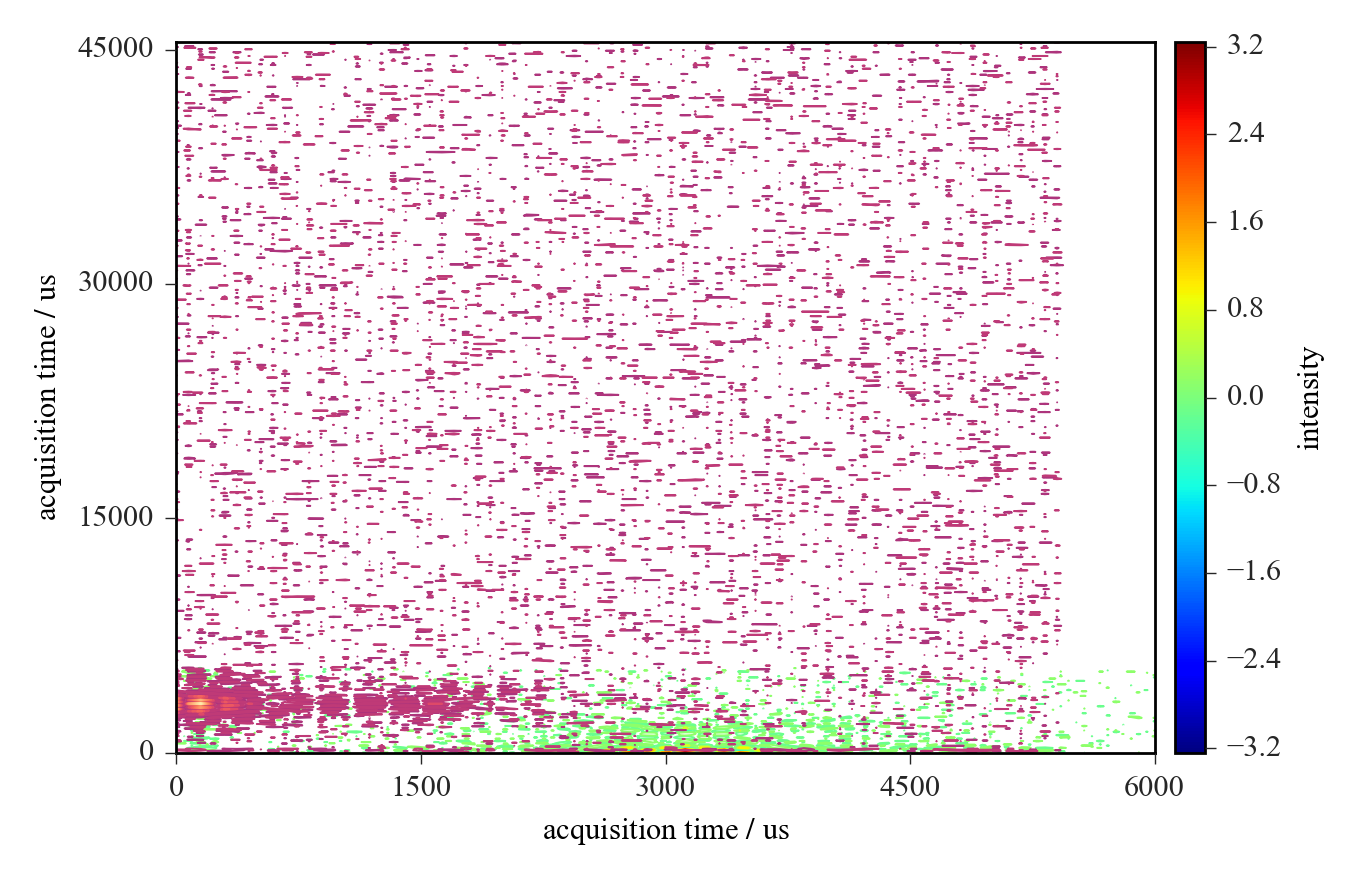

In [16]:
dataset2D.plot_map(xlim=(0.,6000.))
dataset2D.T.plot_map(cmap='magma', xlim=(0.,6000.), data_only=True, clear=False)

## Apodization

In [18]:
# Plot
dataset1D = get_dataset1D() # restore original
dataset1D.plot() 

# Create the apodized dataset
lb_dataset = dataset1D.em(lb=100.*ur.Hz)

lb_dataset.plot(xlim=(0,25000), zlim=(-100,100), clear=False)

t = lb_dataset.ax.text(12500,90,'Dual display (original & apodized fids)', ha='center', fontsize=16)

<IPython.core.display.Javascript object>

[SpectroChemPy] ERROR | KeyError: 'main'


Note that the apodized dataset actually replace the original data

In [10]:
# check that both dataset are the same
lb_dataset is dataset1D  # note here, that the original data are modified by default 
                       # when applying apodization function. 
                       # Use the `inplace` keyword to modify this behavior

True

If we want to avoid this behavior and create a new dataset instead, we use the `inplace` flag.

In [11]:
dataset1D = get_dataset1D()

lb2_dataset = dataset1D.em(lb=100.*ur.Hz, inplace=False)

# check that both dataset are different
lb2_dataset is not dataset1D

True

We can also get only the apodization function

<IPython.core.display.Javascript object>


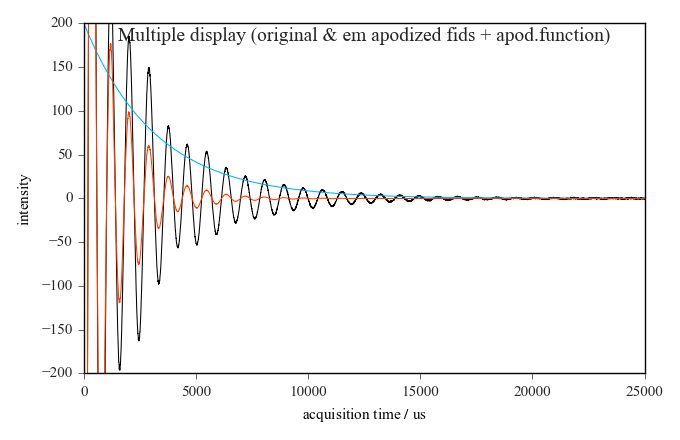

In [12]:
# Plot
dataset1D = get_dataset1D() # restore original
dataset1D.plot() 

# create the apodized dataset (if apply is False, the apodization function is not applied to the dataset, 
# but returned)
apodfunc = dataset1D.em(lb=100.*ur.Hz, apply=False)*200

apodfunc.plot(hold=True)

dataset1D.em(lb=100.*ur.Hz, apply=True)
dataset1D.plot(data_only=True, xlim=(0,25000), zlim=(-200,200), hold=True) 

t = dataset1D.ax.text(12500,180,'Multiple display (original & em apodized fids + apod.function)', ha='center', fontsize=14)

Apodization function can be em, gm, sp ...

<IPython.core.display.Javascript object>


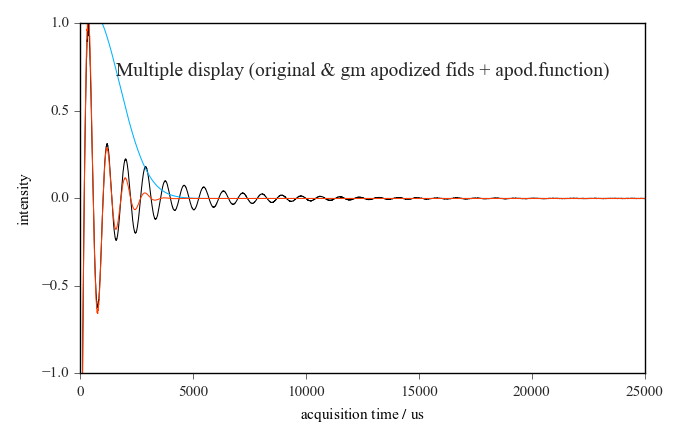

In [13]:
# Plot
dataset1D = get_dataset1D() # restore original
# normalize ampliture
dataset1D /= dataset1D.data.max()

dataset1D.plot() 

LB = 100.*ur.Hz
GB = 300.*ur.Hz
apodfunc = dataset1D.gm(gb=GB, lb=LB, apply=False)

apodfunc.plot(hold=True)

dataset1D.gm(gb=GB, lb=LB) #  apply=True by default

dataset1D.plot(xlim=(0,25000), zlim=(-1,1), hold=True) 

t = dataset1D.ax.text(12500,.70,'Multiple display (original & gm apodized fids + apod.function)', ha='center', fontsize=14)

**TODO**: sp function

### Apodization of 2D data

<IPython.core.display.Javascript object>


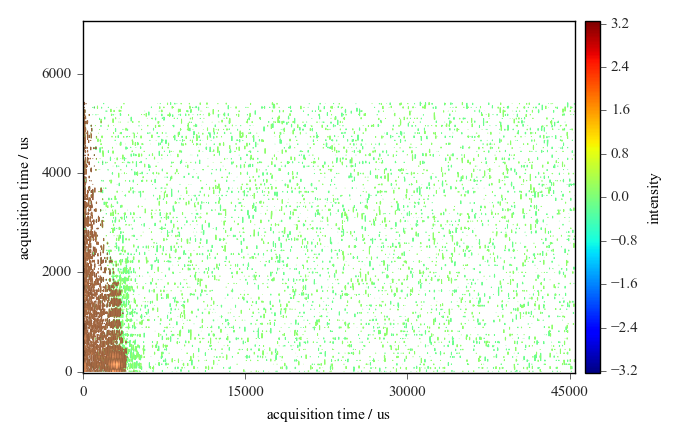

In [14]:
dataset2D = get_dataset2D()
dataset2D.plot(xlim=(0.,25000.))

LB = 200.*ur.Hz
dataset2D.em(lb=LB)
dataset2D.em(lb=LB/2, axis=0)  
dataset2D.plot(data_only=True, cmap='copper', hold=True)

## Time-frequency transforms : FFT

In [15]:
dataset1D = get_dataset1D() # restore original
LB = 10.*ur.Hz
dataset1D.em(lb=LB)
#source1D.zf_auto(inplace=True)
#transf1 = source1D.fft() # by defauut fft create a new dataset

NDDataset: [-1037.267, -1077.841, ...,   -0.011,    0.021] unitless

In [16]:
dataset1D = get_dataset1D() # restore original
LB = 10.*ur.Hz
GB = 50.*ur.Hz
dataset1D.gm(gb=GB, lb=LB)
#dataset1D.zf_auto()
#transf2 = dataset1D.fft()

NDDataset: [-1037.267, -1077.841, ...,   -0.000,    0.000] unitless

As the new dataset is transformed, function that apply to time data such as **em** should not work

In [17]:
#_ = transf1.em(lb=10*ur.Hz)